#  EMF RBM Energy Landscapes

Comparison of Entropy and Energetics Contributions to RBM Free Energy


- use the TAP S and MF Energy *U_naive   
    - which takes an equlibration step first  
    - S(mv, mh), U_naive(mv, mh)
    
- use a simple h = means_hiddens() step
    - S(v, h), E_MF(v, h)


In [1]:
import numpy as np
import h5py

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn import linear_model, datasets, metrics, preprocessing 
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

import psutil

### Helper methods for simple case

In [2]:
from sklearn.utils.fixes import expit    
from sklearn.utils.extmath import safe_sparse_dot

def sig_means(x, b, W):
    a = safe_sparse_dot(x, W.T) + b
    return expit(a, out=a)

In [19]:
import emf_rbm

In [4]:
import rbm_datasets

### binarized Omniglot

In [5]:
train_x, train_t, train_char, test_x, test_t, test_char = rbm_datasets.load_omniglot_iwae()
print train_x.shape, train_t.shape
print "there are ",np.unique(train_char).shape, " classes"

(24345, 784) (24345,)
there are  (55,)  classes


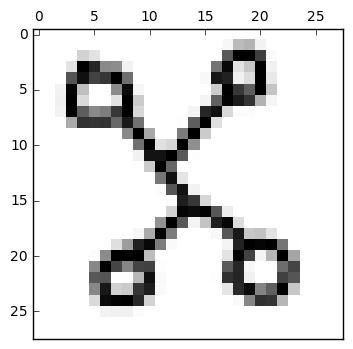

In [6]:
image = train_x[0,:]
image = np.reshape(image,[28,28])
rbm_datasets.show_image(image)

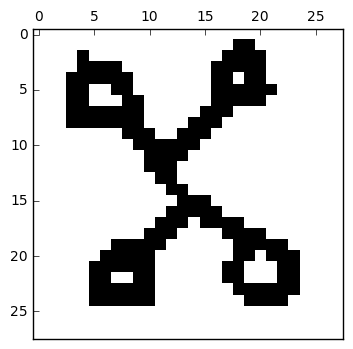

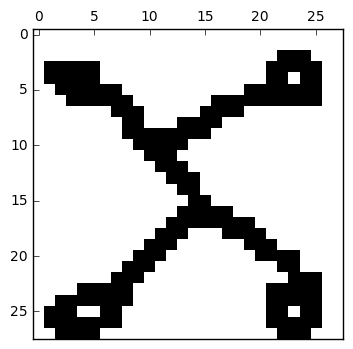

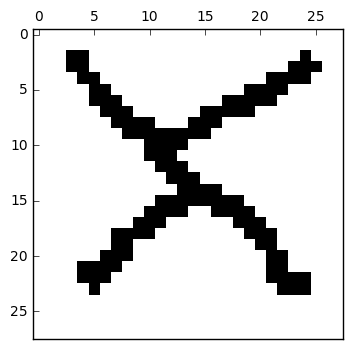

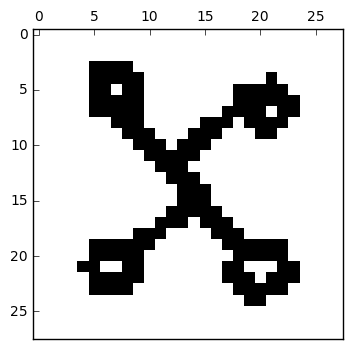

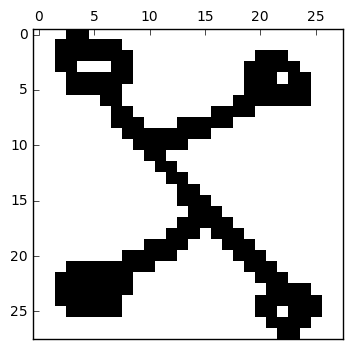

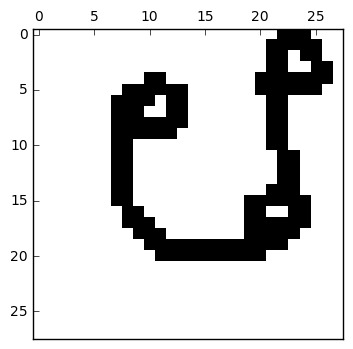

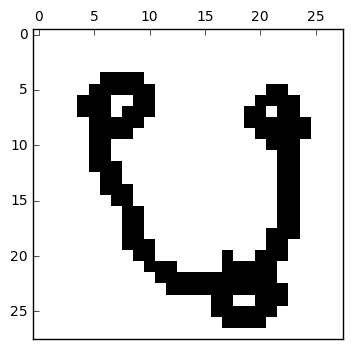

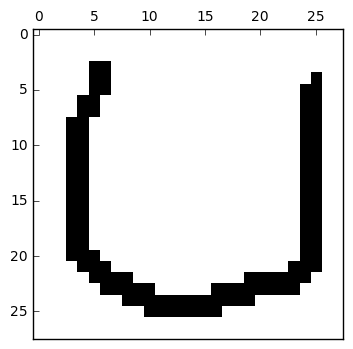

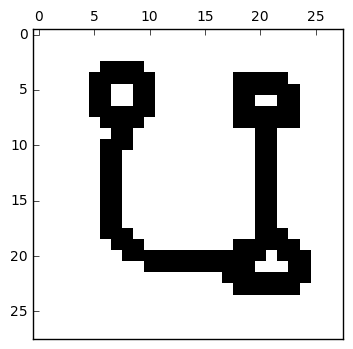

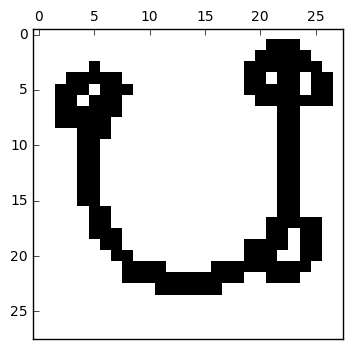

In [7]:
from sklearn.preprocessing import binarize
BX_train = binarize(train_x, threshold=0.2)
for i in range(10):
    image = BX_train[i,:]
    image = np.reshape(image,[28,28])
    rbm_datasets.show_image(image)

In [8]:
X = BX_train

In [9]:
rbm = rbm.EMF_RBM(verbose=True, monitor=True)
rbm.fit(X)

[EMF_RBM] Iteration 1, pseudo-likelihood = -217.07, time = 9.46s
computing TAP Free Energies
monitor:  -276.155397799 385.089327773 108.939002945
[EMF_RBM] Iteration 2, pseudo-likelihood = -212.41, time = 22.44s
computing TAP Free Energies
monitor:  -275.816367219 385.030201504 109.220775216
[EMF_RBM] Iteration 3, pseudo-likelihood = -216.49, time = 22.63s
computing TAP Free Energies
monitor:  -275.114105984 384.595154265 109.510408901
[EMF_RBM] Iteration 4, pseudo-likelihood = -207.10, time = 22.64s
computing TAP Free Energies
monitor:  -271.53508289 380.474232196 109.188470644
[EMF_RBM] Iteration 5, pseudo-likelihood = -200.68, time = 22.73s
computing TAP Free Energies
monitor:  -264.095911781 362.714181768 99.4699375717
[EMF_RBM] Iteration 6, pseudo-likelihood = -190.38, time = 22.75s
computing TAP Free Energies
monitor:  -255.924272704 345.891433034 91.2270124162
[EMF_RBM] Iteration 7, pseudo-likelihood = -179.02, time = 22.70s
computing TAP Free Energies
monitor:  -249.530488232 3

EMF_RBM(batch_size=100, decay=0.01, learning_rate=0.005, momentum=0.5,
    monitor=True, n_components=256, n_iter=20, neq_steps=3,
    random_state=<mtrand.RandomState object at 0x7f5814086a50>,
    sigma=0.001, thresh=1e-08, verbose=True, weight_decay='L1')

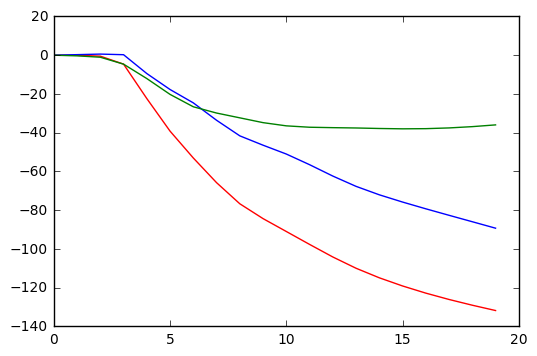

In [12]:
plt.plot(rbm.entropies-rbm.entropies[0], color='red')
plt.plot(rbm.mean_field_energies-rbm.mean_field_energies[0], color='blue')
plt.plot(rbm.free_energies-rbm.free_energies[0], color='green')

### Random Data

In [13]:
noise = np.random.normal(size=X.shape)

In [14]:
N = X+noise;

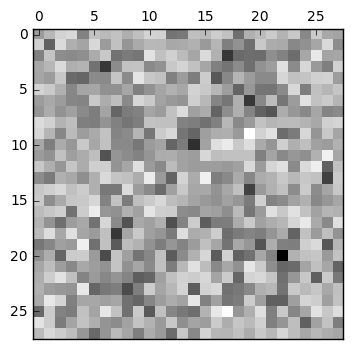

In [16]:
v = N[0,:]
rbm_datasets.show_image(np.reshape(v,[28,28]))

###  not really binarized but it should be

In [ ]:
rbm = emf_rbm.EMF_RBM(verbose=True, monitor=True)
rbm= rbm.fit(N)

[EMF_RBM] Iteration 1, pseudo-likelihood = -1643.18, time = 9.54s
computing TAP Free Energies
monitor:  -152.444200443 414.609709171 262.185777638


In [ ]:
plt.plot(rbm.entropies-rbm.entropies[0], color='red')
plt.plot(rbm.mean_field_energies-rbm.mean_field_energies[0], color='blue')
plt.plot(rbm.free_energies-rbm.free_energies[0], color='green')